# TP1 Traitement du signal

In [4]:
imatlab_export_fig('print-png')  % Static svg figures.

## 1- Un peu de piano...

Les partitions musicales utilisent un ensemble fini de notes qui peuvent s'exprimer en fréquence suivant la formule
$$ F^{note}_{Hz}=440\times 2^\dfrac{note-69}{12}$$

et la table de correspondance si dessous.

![Table](https://forgeim.univ-lyon1.fr/M1MAS2018/thierry.clopeau/Tablenote.png)

Construire les premières notes de "au claire de la lune" ou "Frère Jaques" ...

In [1]:
function wave = key(p, n, fs)
    t = 0:1/fs:4/n;
    idx = 440*2^((p-49)/12);
    mid = (t(1)+t(end))/2;
    tri = -(abs(t-mid)-mid);
    tri = tri./max(tri);
    wave = (sin(2*pi*idx*t)).*tri;
end


In [2]:
fs = 44100;



do_1 = key(52,8,fs);
re = key(54,8,fs);  
mi = key(56,8,fs); 
fa = key(57,8,fs); 
so = key(59,8,fs);  
la = key(61,8,fs);  
si = key(63,8,fs);  

do_4 = key(52,4,fs);  
re_4 = key(54,4,fs);  
mi_4 = key(56,4,fs); 
fa_4 = key(57,4,fs);  
so_4 = key(59,4,fs);  
la_4 = key(61,4,fs); 
si_4 = key(63,4,fs);  

line1 = [ do_1 do_1 so so la la so_4];
line2 = [ fa fa mi mi re re do_4];
line3 = [ so so fa fa mi mi re_4];
line4 = [ so so fa fa mi mi re_4];
line5 = [ do_1 do_1 so so la la so_4];
line6 = [ fa fa mi mi re re do_4];

song = [line1 line2 line3 line4 line5 line6];


In [3]:
audiowrite ('song.wav', song, fs)

##  2-  Filtres linéaire, passe haut, passe bas...

Un des grands domaines du traitement du signal est la séparation de sources. L’idée est, à partir d’un mélange de différents signaux provenant de plusieurs sources (par exemple plusieurs personnes qui parlent en même temps), de parvenir à séparer chacune des sources (par exemple retrouver ce qu’a dit chaque personne). 
Dans notre cas, nous allons tenter d’additionner deux signaux sonores, et reconstruire chacun d’entre eux grâce à un filtrage en fréquence.

Soit 
* $F_1(t)=cos(12\pi t)$
* $F_2(t)=0.3 cos(45\pi t)sin(20\pi t)$
* $F_3(t)=sin(120\pi t + \pi/3)$

On forme le signal $F(t)=F_1(t)+F_2(t)+F_3(t)$ pour $t\in[0 ; 1]$ que l'on échantillonne...
A l'aide de la transformée de fourrier séparer et reconstruisez les 3 signaux originaux.

Mot clef MATLAB : **fft**, **ifft**

### Bonus :

Séparer le chant des mouettes https://lasonotheque.org/detail-0267-mer-vagues-moyennes-et-mouettes.html

In [195]:
Fs = 1000;            % Sampling frequency                    
T = 1/Fs;             % Sampling period       
L = 1500;             % Length of signal
t = (0:L-1)*T;        % Time vector

In [196]:
x = cos(12*pi*t)+(0.3*(cos(45*pi*t).*sin(20*pi*t)))+sin(   (120*pi*t) + (ones(1,length(t))*(pi/3))   );

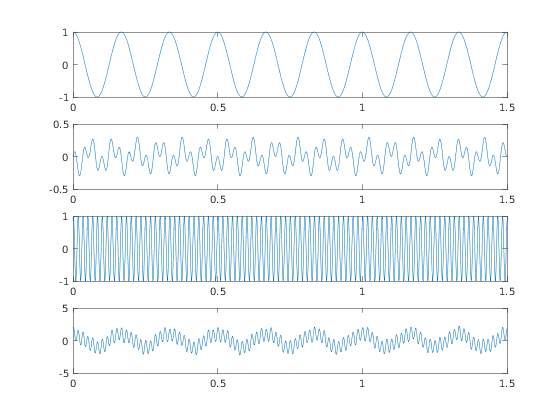

In [174]:
subplot(4,1,1)
plot(t,cos(12*pi*t))
subplot(4,1,2)
plot(t,(0.3*(cos(45*pi*t).*sin(20*pi*t))))
subplot(4,1,3)
plot(t,sin(   (120*pi*t) + (ones(1,length(t))*(pi/3))   ))
subplot(4,1,4)
plot(t,x)

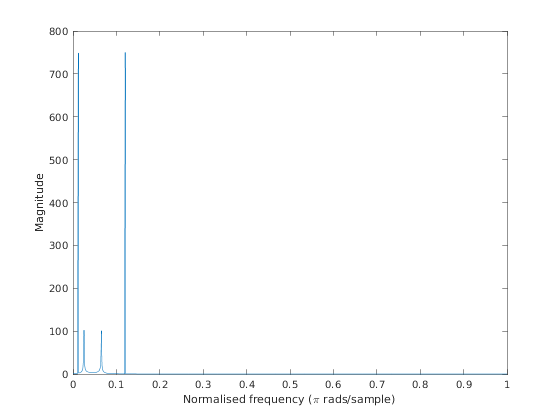

In [230]:
X_mags = abs(fft(x));
figure(10)
plot(X_mags)
xlabel('DFT Bins')
ylabel('Magnitude')
 
%plot first half of DFT (normalised frequency)
num_bins = length(X_mags);
plot([0:1/(num_bins/2 -1):1], X_mags(1:num_bins/2))
xlabel('Normalised frequency (\pi rads/sample)')
ylabel('Magnitude')

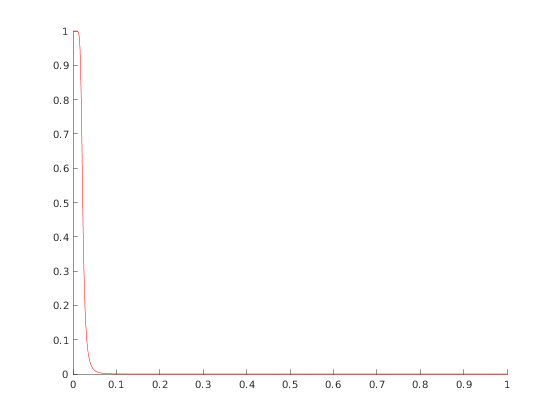

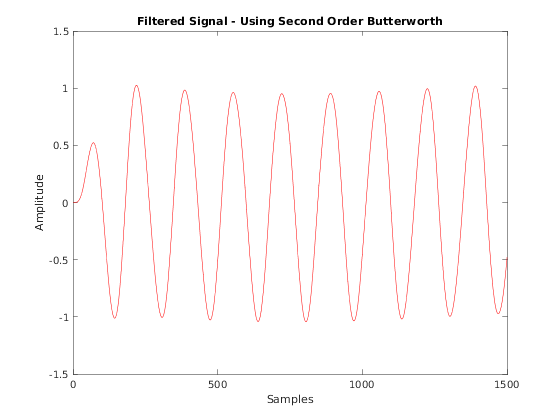

In [234]:
%design a second order filter using a butterworth design technique 
[b a] = butter(5, 0.02, 'low');
 
%Show the signal flow diagram of the filter/system
%this function available from https://dadorran.wordpress.com

 
%plot the frequency response (normalised frequency)
H = freqz(b,a, floor(num_bins/2));
hold on
plot([0:1/(num_bins/2 -1):1], abs(H),'r');
 
%filter the signal using the b and a coefficients obtained from
%the butter filter design function
x_filtered = filter(b,a,x);
 
%plot the filtered signal
figure(2)
plot(x_filtered,'r')
title('Filtered Signal - Using Second Order Butterworth')
xlabel('Samples');
ylabel('Amplitude')

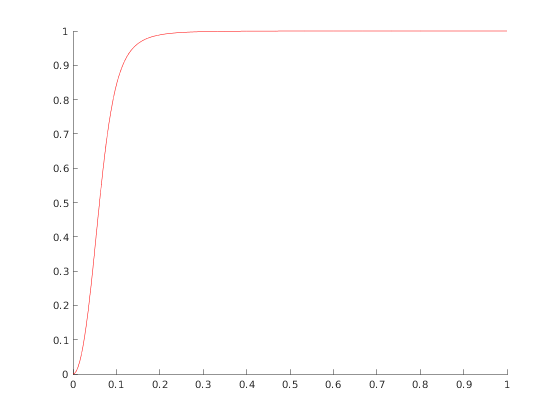

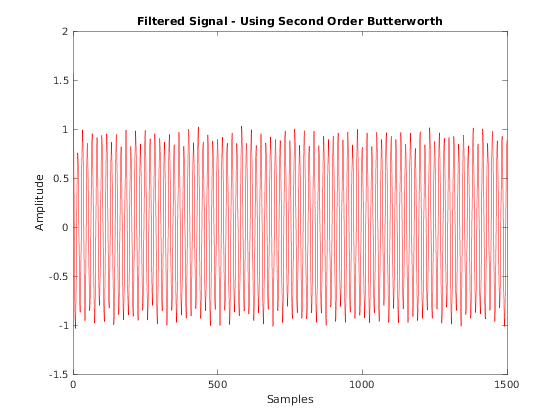

In [237]:
%design a second order filter using a butterworth design technique 
[b a] = butter(2, 0.08, 'high');
 
%Show the signal flow diagram of the filter/system
%this function available from https://dadorran.wordpress.com

 
%plot the frequency response (normalised frequency)
H = freqz(b,a, floor(num_bins/2));
hold on
plot([0:1/(num_bins/2 -1):1], abs(H),'r');
 
%filter the signal using the b and a coefficients obtained from
%the butter filter design function
x_filtered = filter(b,a,x);
 
%plot the filtered signal
figure(2)
plot(x_filtered,'r')
title('Filtered Signal - Using Second Order Butterworth')
xlabel('Samples');
ylabel('Amplitude')

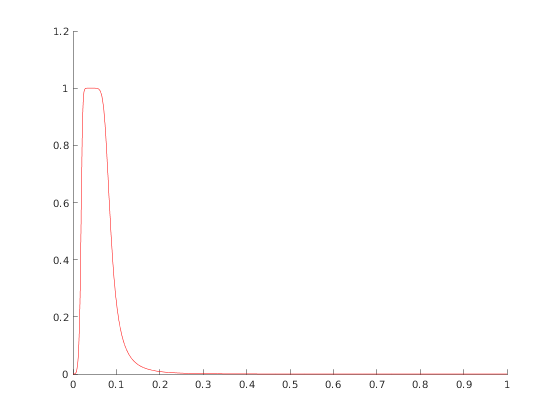

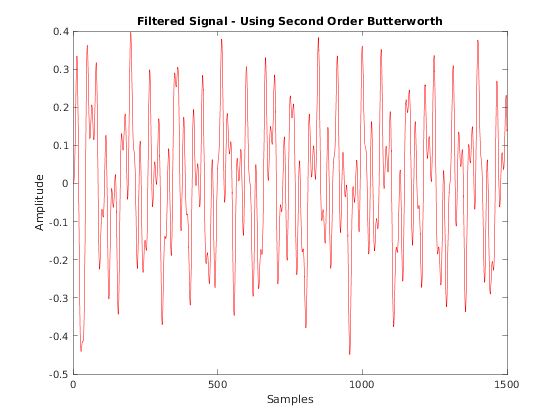

In [270]:
%design a second order filter using a butterworth design technique 
[b a] = butter(4, [0.02, 0.08]);
 
%Show the signal flow diagram of the filter/system
%this function available from https://dadorran.wordpress.com

 
%plot the frequency response (normalised frequency)
H = freqz(b,a, floor(num_bins/2));
hold on
plot([0:1/(num_bins/2 -1):1], abs(H),'r');
 
%filter the signal using the b and a coefficients obtained from
%the butter filter design function
x_filtered = filter(b,a,x);
 
%plot the filtered signal
figure(2)
plot(x_filtered,'r')
title('Filtered Signal - Using Second Order Butterworth')
xlabel('Samples');
ylabel('Amplitude')

In [249]:
fftx=fft(x);

In [272]:
[pks,locs] = findpeaks(abs(fftx))


pks =

  Columns 1 through 7

  748.2780  102.1360  100.4497  749.8831  749.8831  100.4497  102.1360

  Column 8

  748.2780


locs =

  Columns 1 through 6

          10          20          50          91        1411        1452

  Columns 7 through 8

        1482        1492



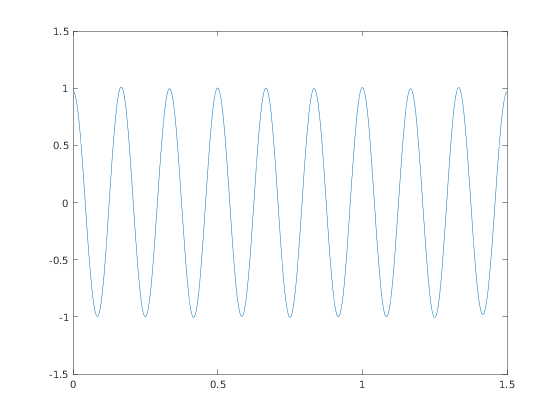

In [263]:
f1=zeros(1,length(fft(x)));
f1(5:15)=fftx(5:15);
f1((1411-5 ):(1411+5) )=fftx((1411-5 ):(1411+5) );
Xsym = ifft(f1,'symmetric');
plot(t,Xsym )

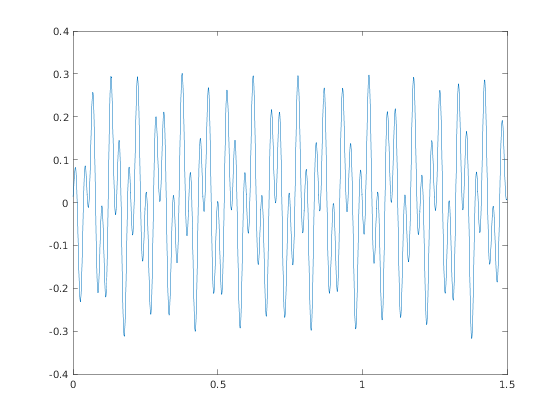

In [268]:
f2=zeros(1,length(fft(x)));
f2( [15:25,45:55]  )=fftx([15:25,45:55] );
f2(  [( 1452-5 ):( 1452+5), (1482 -5):(1482 +5) ])=fftx( [( 1452-5 ):( 1452+5), (1482 -5):(1482 +5) ] );
Xsym2 = ifft(f2,'symmetric');
plot(t,Xsym2 )

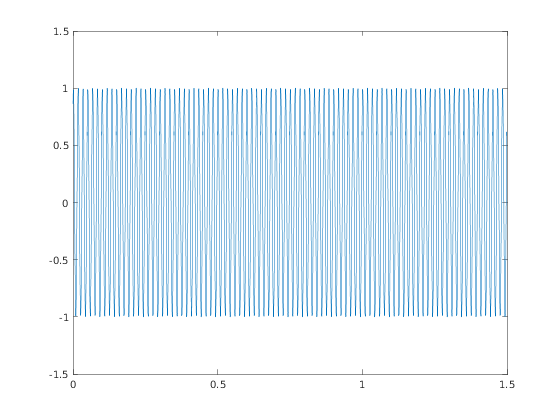

In [269]:
f1=zeros(1,length(fft(x)));
f1(( 91-5):( 91+5))=fftx(( 91-5):( 91+5));
f1(( 1492-5 ):( 1492+5) )=fftx(( 1492-5 ):( 1492+5) );
Xsym = ifft(f1,'symmetric');
plot(t,Xsym )

## 3- Compression mp3  (simplifiée)

Les fichiers extension .Wav, est un format de fichier non-compressé.

La compression mp3 (plus généralement mpeg-1 à 3) est basée sur la représentation fréquentielle du signal. Essentiellement, il s’agit de calculer la représentation fréquentielle du signal et ”d’oublier” (ou réduire à 0) les frequences les moins puissantes ou les moins audibles en regard des autres fréquences audibles au
même moment.

A partir d'un fichier .wav, faire sa transformation fréquentiel, éliminer les fréquences qui ont l'amplitude les plus faible (ou plus petit q'un certain seuil) à l'aide de la transformée inverse, écouter le résultat avec 10%, 20%, 30% ... de frèquence en moins.



# Matlab Kernel

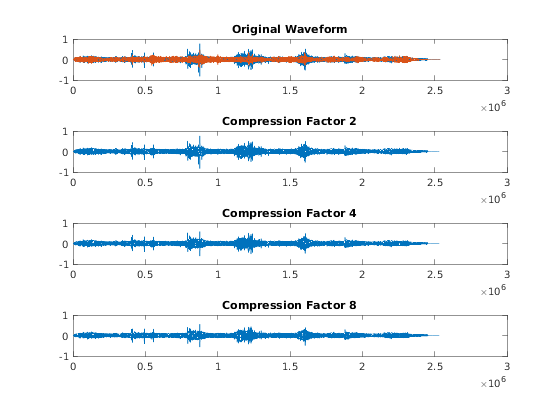

In [5]:
[sound, f] =  audioread('0267.wav');

%chosing a block size 
windowSize = 8192;

%changing compression  percentages
samplesHalf = windowSize / 2;
samplesQuarter = windowSize / 4;
samplesEighth = windowSize / 8;

%initializing compressed matrice
soundCompressed2 = [];
soundCompressed4 = [];
soundCompressed8 = [];

%actual compression
for i=1:windowSize:length(sound)-windowSize
    windowDCT = dct(sound(i:i+windowSize-1));
   soundCompressed2(i:i+windowSize-1) = idct(windowDCT(1:samplesHalf), windowSize);
   soundCompressed4(i:i+windowSize-1) = idct(windowDCT(1:samplesQuarter), windowSize);
soundCompressed8(i:i+windowSize-1) = idct(windowDCT(1:samplesEighth), windowSize);
end

%plotting audio signals
figure(1)
h1 = subplot(4,1,1);
plot(sound), title('Original Waveform');
subplot(4,1,2)
plot(soundCompressed2), title('Compression Factor 2'), axis(axis(h1));
subplot(4,1,3)
plot(soundCompressed4), title('Compression Factor 4'), axis(axis(h1));
subplot(4,1,4)
plot(soundCompressed8), title('Compression Factor 8'), axis(axis(h1));




In [2]:
audiowrite('soundCompressed2.wav',soundCompressed2,f);
audiowrite('soundCompressed4.wav',soundCompressed4,f);
audiowrite('soundCompressed8.wav',soundCompressed8,f);

## 4 Décomposition en base de Haar

A partir d'un signal de longueur $2^N$ (aléatoire ou pas) écrire une fonction **fhaar** qui transforme le signal dans la base de Haar (Discrète) et la fonction **ifhaar** qui fait l'inverse, qui part de la transformée en base de Haar et reconstruit le signal de départ.

Tracer une représentation (voir scalogramme) de la transformée en base de Haar.

On pourra consulter http://www.epm6604b.be/ondelette_haar.html pour un exemple de décomposition sans normalisation de la base.


# Octave Kernel

In [1]:

function y=fhaar(v)
n=length(v);
s = sqrt(2);
k = 1;
while ( k * 2 <= n )
k = k * 2;
end

while (  k >1)
  

k = floor ( k / 2 );

w(  1:  k) = ( v(1:2:2*k-1) + v(2:2:2*k) ) / s;


w(k+1:k+k) = ( v(1:2:2*k-1) - v(2:2:2*k) ) / s;
v(1:2*k) = w(1:2*k);


end
y=v;
end

In [2]:
function y=ifhaar(v)
n=length(v);
s = sqrt(2);
w = zeros ( n, 1 );
m = 1;
while ( m * 2 <= n )
w(1:2:2*m-1) = ( v(1:m) + v(1+m:m+m) ) / s;

w(2:2:2*m)   = ( v(1:m) - v(1+m:m+m) ) / s;

v(1:2*m) = w(1:2*m);
m = m * 2;
end
y=v;
end

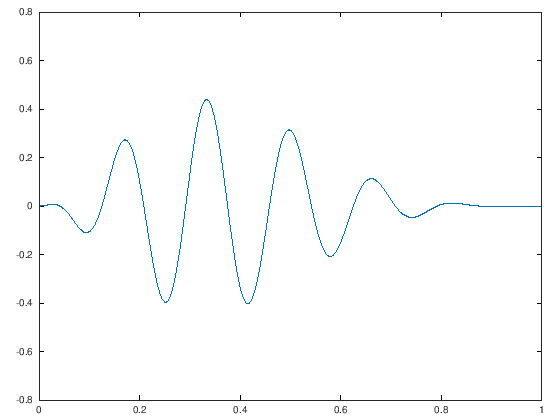

In [3]:
t=0:0.0001:1;
f=20*(t.^2).*(1-t).^4.*cos(12*t.*pi); 
plot(t,f)

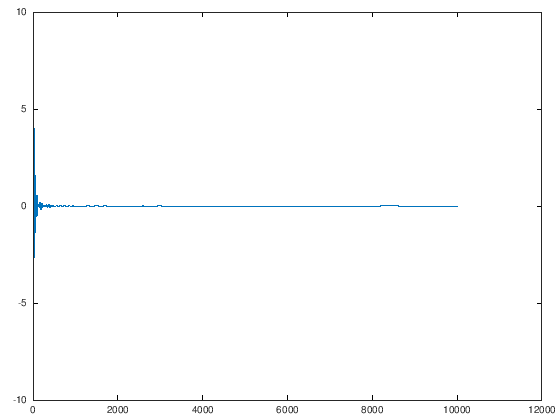

In [4]:
plot(fhaar(f))

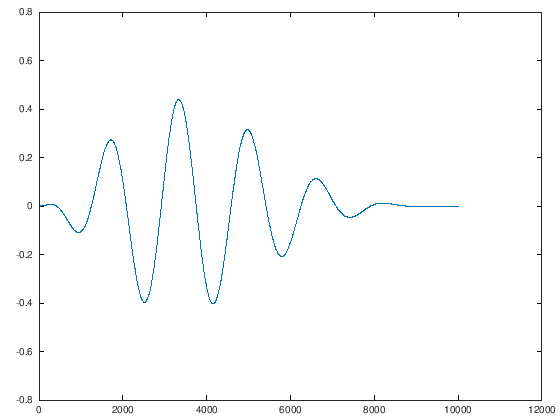

In [5]:
plot(ifhaar(fhaar(f)))

# Matlab Kernel

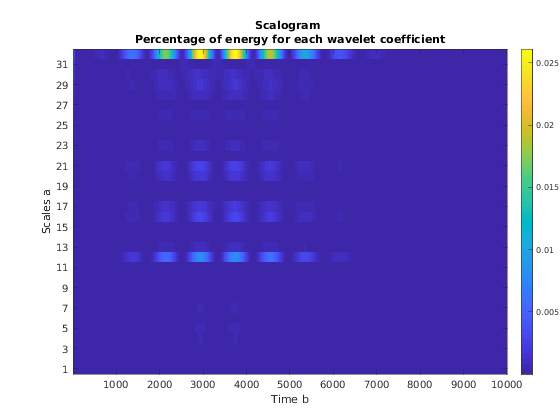

In [7]:
COEFS = cwt(f,1:32,'cgau4');

% Compute and plot the scalogram (image option)
figure;
SC = wscalogram('image',COEFS);

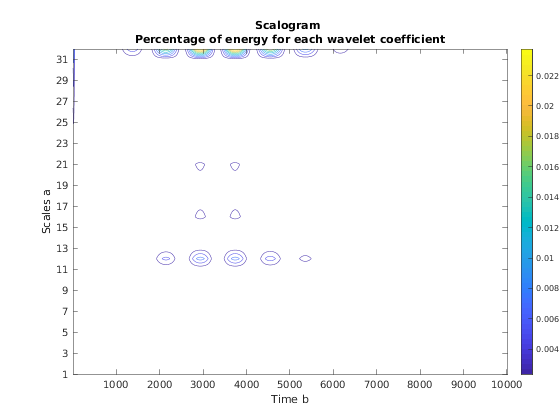

In [9]:
figure;
SC = wscalogram('contour',COEFS);

# Un peu de technique :

##  - Ecouter un fichier son dans un notebook

Mettre dans src le nom du fichier, mp3, wav ...

In [15]:
%%html
<audio controls>
 <source src="https://s7.ytdl.info/dl.php?id=ff97bb4c4033611c17114d6024d4e314" type="audio/mpeg">
 Your browser does not support the audio element.
</audio>

Error: Unexpected MATLAB operator.



## - Lire, écrire un fichier son de Matlab (format wav)


In [ ]:
[y,Fs] = audioread(filename)
audiowrite(filename,y,Fs);